# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**FINAL PROJECT HACKTIV8 HCK-014 - Product Recomendation Using Computer Vision**</p>

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Introduction**</p>

## **Team Member**  

**1. Anjas Fajar Maulana (Data Scientist)  
2. Fazrin Muhammad (Data Analyst)  
3. Naufal Andika Ramadhan (Data Engineer)  
4. Salsa Sabitha Hurriyah (Data Scientist)**

## **Objective**

The objective of this project is to develop an image-based recommendation system for online trading platforms. The system will receive input in the form of an image of the desired product by the user and then use computer vision technology to classify the product. After recognizing the product in question, the system will provide recommendations of similar products based on the analysis of the image and product features. This will allow users to find products that match their preferences more easily and quickly.

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Problem Statment**</p>

In the rapidly growing online commerce industry, users often face difficulties in finding products that match their preferences among the millions of items available. Therefore, it is important for online commerce platforms to provide a more personalized and efficient shopping experience for their users. With the advancement of computer vision technology, companies can implement an image-based recommendation system that can classify products based on images inputted by users and provide recommendations for similar items.

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Import Libraries**</p>

In [1]:
# Import libraries
import os
import cv2
import glob
import random
import string
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import applications
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Input,GlobalAveragePooling2D,Add
from IPython.display import display, Image
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

**Explanation**  
import libraries as tools to assist in coding python for analysis, data manipulation, data visualization, creating models, *training* models, and testing models, as well as importing results files from model predictions.

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Data Loading**</p>

## **Loading Data CSV**

In [35]:
# Define Variable for  Load data CSV
fashion_df = pd.read_csv('fashion.csv')

**Explanation**  
Syntax above import the data from local to notebook, this allows us to access and manipulate the dataset within the notebook environment, doing further exploration and preprocessing of the data for our analysis and modeling.

## **Top 5 & Bottom 5**

In [36]:
# Show the first 5 data
print('The First 5 Rows Data')
display(fashion_df.head())

# Show the last 5 data
print('The Last 5 Rows Data')
display(fashion_df.tail())

The First 5 Rows Data


,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
0,42419,Girls,Apparel,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/p...
1,34009,Girls,Apparel,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/p...
2,40143,Girls,Apparel,Topwear,Tops,Blue,Casual,Gini and Jony Girls Pretty Blossom Blue Top,40143.jpg,http://assets.myntassets.com/v1/images/style/p...
3,23623,Girls,Apparel,Topwear,Tops,Pink,Casual,Doodle Kids Girls Pink I love Shopping Top,23623.jpg,http://assets.myntassets.com/v1/images/style/p...
4,47154,Girls,Apparel,Bottomwear,Capris,Black,Casual,Gini and Jony Girls Black Capris,47154.jpg,http://assets.myntassets.com/v1/images/style/p...


The Last 5 Rows Data


,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
2901,51755,Women,Footwear,Shoes,Casual Shoes,Black,Casual,Catwalk Women Black Shoes,51755.jpg,http://assets.myntassets.com/v1/images/style/p...
2902,47630,Women,Footwear,Shoes,Flats,Blue,Casual,Carlton London Women Blue Shoes,47630.jpg,http://assets.myntassets.com/v1/images/style/p...
2903,32836,Women,Footwear,Shoes,Flats,Pink,Casual,Grendha Women Flori Pink Sandals,32836.jpg,http://assets.myntassets.com/v1/images/style/p...
2904,35821,Women,Footwear,Shoes,Heels,Black,Casual,Enroute Women Black Heels,35821.jpg,http://assets.myntassets.com/v1/images/style/p...
2905,18553,Women,Footwear,Shoes,Heels,Blue,Casual,Catwalk Women Mary Janes Blue Flats,18553.jpg,http://assets.myntassets.com/v1/images/style/p...


**Explanation**  
We can see the data has succesfully loaded to notebook and there are 10 highest and 10 lowest data from the dataframe that we have loaded.

## **Checking Data Matrix**

In [4]:
# Checking dataframe dimension
fashion_df.shape

(2906, 9)

**Explaination**  
The data has 2906 row and 9 columns, from this we can see the matrix of the dataset

## **Checking Data Columns**

In [5]:
# Checking name of columns in dataframe
fashion_df.columns

Index(['Gender', 'Category', 'SubCategory', 'ProductType', 'Colour', 'Usage',
       'ProductTitle', 'Image', 'ImageURL'],
      dtype='object')

**Explanation**  
From the columns above, we can see what columns are in the dataset, from here we can already start considering what columns can become optional features.

## **Checking Data Duplicate**

In [6]:
# Checking Duplicate data
fashion_df.duplicated().sum()

0

**Explanation**  
From the result we can see the dataframe dont have duplicated data, so we dont need to handling the duplicates

## **Checking Data Detail**

In [7]:
# Checking data detail
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2906 entries, 42419 to 18553
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        2906 non-null   object
 1   Category      2906 non-null   object
 2   SubCategory   2906 non-null   object
 3   ProductType   2906 non-null   object
 4   Colour        2906 non-null   object
 5   Usage         2906 non-null   object
 6   ProductTitle  2906 non-null   object
 7   Image         2906 non-null   object
 8   ImageURL      2906 non-null   object
dtypes: object(9)
memory usage: 227.0+ KB


**Explanation**  
We can see the details of the data, starting from the dataframe matrix to the column name and data type of the data in the dataframe. 
- Dataset has 2906 rows with 9 columns
- Consists of 9 columns of object/string.
- There are indication that the dataset hasnt missing value.

## **Checking Missing Values**

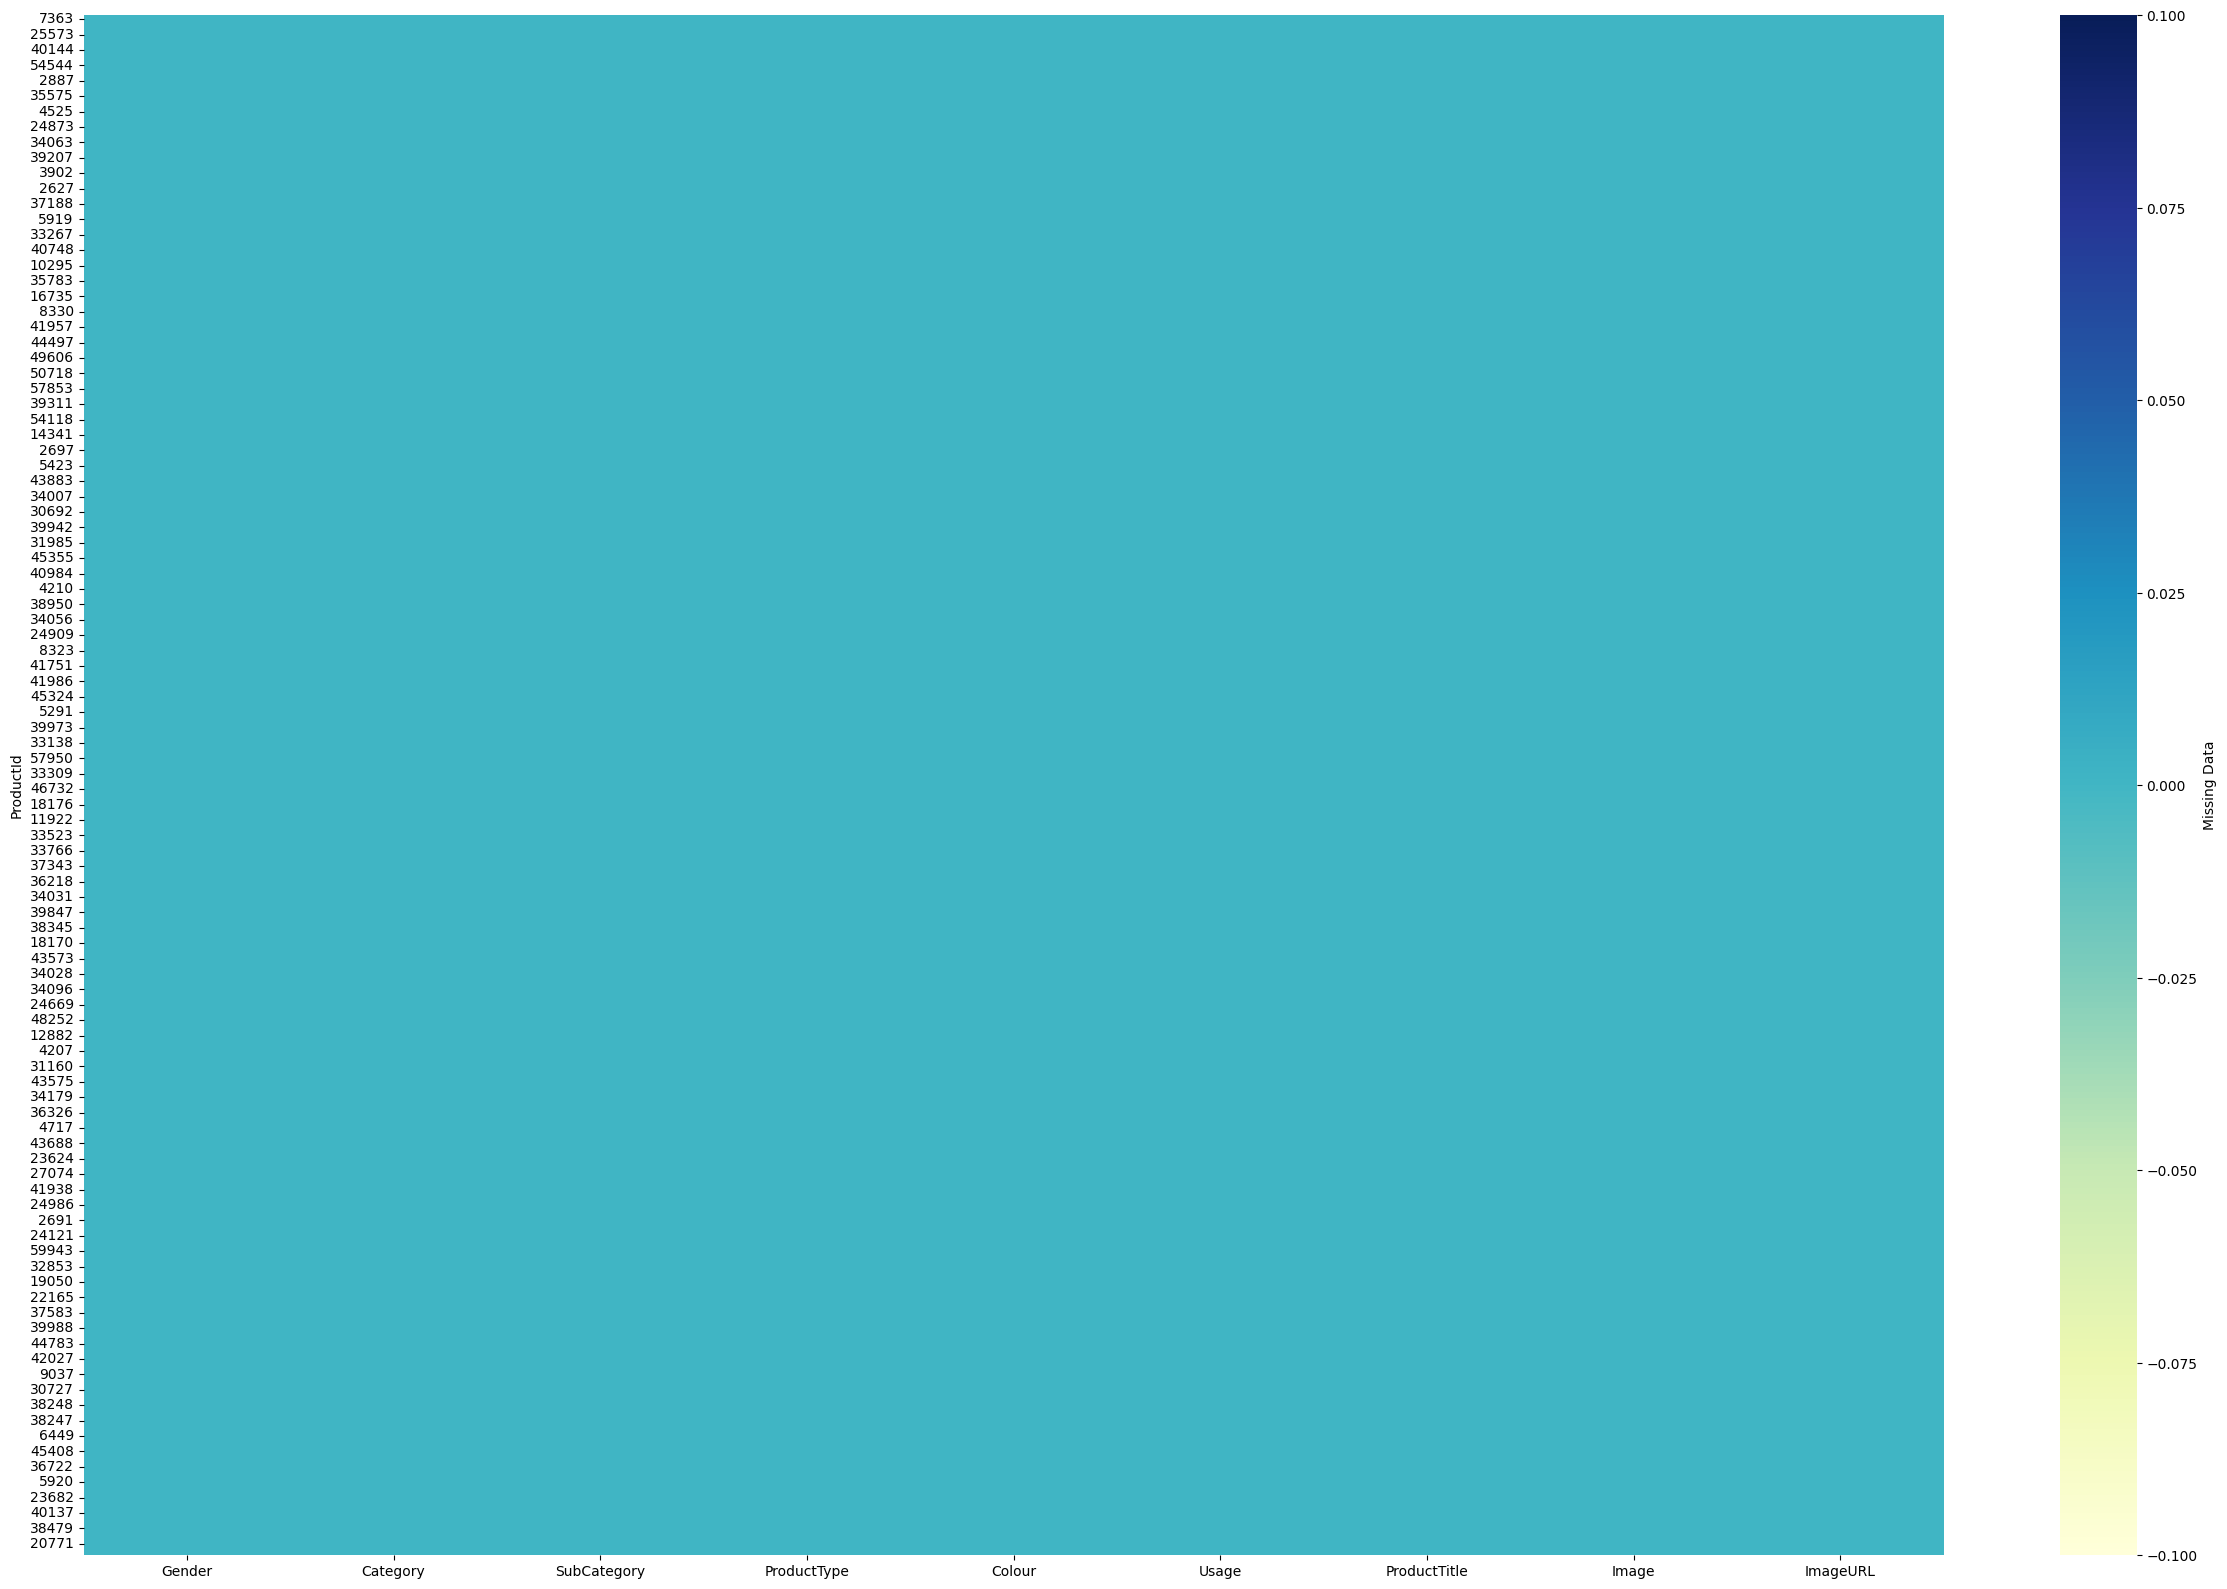

In [8]:
# Create Canvas
plt.figure(figsize=(30,20))

# Visualize the missing value using heatmap
sns.heatmap(fashion_df.sample(200).isna(), cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

# show the plot
plt.show()

**Explanation**  
From result of visualization we cann see the data hasnt have Missing Values, so we dont need to Handling it

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Feature Engineering**</p>

## **Splitting Data**

In [45]:
# Define Variable to Image Dataset
# dataset_path = "Fashion_Dataset"

# Create directories for train, test, and validation sets
# train_dir = "train"
# test_dir = "test"
# val_dir = "validation"

# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)

# Split the dataset into train, test, and validation sets
# for cls in os.listdir(dataset_path):

    # Path to class folder
    # class_path = os.path.join(dataset_path, cls)

    # Create sub-directories for the current class in the train, test, and validation sets
    # os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    # os.makedirs(os.path.join(test_dir, cls), exist_ok=True)
    # os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    # Split the data into train, test, and validation sets
    # images = os.listdir(class_path)
    # train_images, test_val_images = train_test_split(images, test_size=0.3, random_state=42)
    # test_images, val_images = train_test_split(test_val_images, test_size=0.5, random_state=42)

    # Move the image into the appropriate directory
#     for img in train_images:
#         src = os.path.join(class_path, img)
#         dst = os.path.join(train_dir, cls, img)
#         shutil.copyfile(src, dst)

#     for img in test_images:
#         src = os.path.join(class_path, img)
#         dst = os.path.join(test_dir, cls, img)
#         shutil.copyfile(src, dst)

#     for img in val_images:
#         src = os.path.join(class_path, img)
#         dst = os.path.join(val_dir, cls, img)
#         shutil.copyfile(src, dst)

# print("The dataset has been divided into train, test, and validation sets.")

The dataset has been divided into train, test, and validation sets.


**Note** : The data is already split, we make it comment because we use the local file to inference

**Explanation**  
From the syntax above we create looping condition to seperating data into 3 parts which is `Train-set`, `Test-set` and `Validation-set`.  
This separation enables us to focus on the features that will be used to make predictions and the target variable we aim to predict, streamlining the modeling process. Separating features from the target is vital for supervised learning. It isolates the target variable from the ones used for prediction (features), preventing the model from learning from the target during training, thus `avoiding bias or overfitting`.   

In [9]:
# Define directories for train, test, and validation sets
# Define Variable to Image Dataset
# dataset_path = "Fashion_Dataset"
train_dir = "train"
test_dir = "test"
val_dir = "validation"

## **Checking Data Values**

In [10]:
# Function to view the amount of data for each class
def check_path(path):
    labels = os.listdir(path)
    for label in labels:
        num_data = len(os.listdir(os.path.join(path, label)))
        print(f'Total Data - {label} : {num_data}')

print('Train Path')
check_path(train_dir)
print('')

print('Val Path')
check_path(val_dir)
print('')

print('Test Path')
check_path(test_dir)

Train Path
Total Data - Boys : 531
Total Data - Girls : 396
Total Data - Men : 567
Total Data - Women : 538

Val Path
Total Data - Boys : 114
Total Data - Girls : 86
Total Data - Men : 122
Total Data - Women : 116

Test Path
Total Data - Boys : 114
Total Data - Girls : 85
Total Data - Men : 122
Total Data - Women : 115


**Explanation**  
From the syntax above we get the result after the data splitting process. We can see from each `Train`, `Test` and `Validation` values number.

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Exploratory Data Analysis**</p>

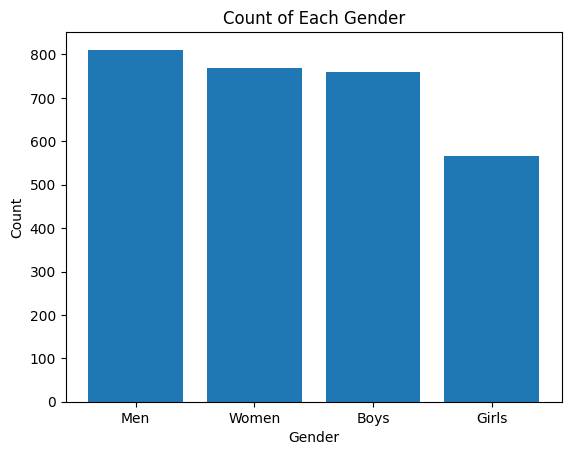

In [11]:
# Assuming `df` is your DataFrame containing the "Gender" column
gender_counts = fashion_df['Gender'].value_counts()

# Create a bar chart
plt.bar(gender_counts.index, gender_counts.values)

# Add title and labels
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

**Explanation**  
As we can see the bar chart displays the distribution of data across four categories (Boys, Girls, Men, Women) in the mode dataset. We can see that between `Boys`, `Men` and `Women` have fairly even data, but for `Girls` there tends to be less than the others.

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Preprocessing**</p>

In [12]:
# Define hyperparameters
img_height= 224
img_width= 224
batch_size= 64

**Explanation**  
From the syntax we define hyperparameters for the model

In [13]:
# Create batch generator for train-set, val-set, and test-set
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                                                                validation_split=0.4)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(img_height,img_width),
                                              class_mode='sparse',
                                              subset='training',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=2)

val_set = train_datagen.flow_from_directory(val_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='sparse',
                                            subset='validation',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(img_height,img_width),
                                            class_mode='sparse',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=2)

Found 1221 images belonging to 4 classes.
Found 173 images belonging to 4 classes.
Found 436 images belonging to 4 classes.


**Explanation**  
The syntax sets up data generators for training, validation, and testing datasets using TensorFlow's Keras API for image data preprocessing. It aims to prepare image data for feeding into a machine learning model. These data generators are crucial for efficiently managing memory usage and improving computational efficiency by dynamically loading and preprocessing images in batches during model training or evaluation, rather than loading all images into memory at once. This setup is especially beneficial for training deep learning models on large datasets.

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Model Definition**</p>

In [14]:
# Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API model
model_seq = Sequential()

# Convolution Architechture
model_seq.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width,3)))
model_seq.add(MaxPooling2D(2, 2))
model_seq.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='RandomNormal'))
model_seq.add(MaxPooling2D(2, 2))
model_seq.add(Conv2D(128, (3,3),activation='relu', kernel_initializer='RandomNormal'))
model_seq.add(MaxPooling2D(2, 2))
model_seq.add(Conv2D(256, (3,3),activation='relu', kernel_initializer='RandomNormal'))
model_seq.add(MaxPooling2D(2, 2))

# Architechture
model_seq.add(Flatten())
model_seq.add(Dropout(0.5))
model_seq.add(Dense(256, activation='relu', kernel_initializer='RandomNormal'))
model_seq.add(Dense(4, activation='softmax'))

# Compile
model_seq.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_seq.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,826,884 (37.49 MB)

 Trainable params: 9,826,884 (37.49 MB)

 Non-trainable params: 0 (0.00 B)

**Explanation**  
Model Architecture
1. Sequential Model: The model is sequential, allowing layers to be added in a straightforward stack.
2. Convolutional Layers:
    - First Layer: Convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation. This is the input layer expecting image dimensions of img_height x img_width x 3.
    - Pooling Layer: Followed by a 2x2 MaxPooling layer to reduce the spatial dimensions.
    - Additional Convolutional Layers: Three more convolutional layers with increasing filters (64, 128, and 256), each followed by a 2x2 MaxPooling layer. These layers help in capturing more complex patterns in the image data.
    - Flattening: Flattens the output from the convolutional layers to form a single long feature vector.
3. Dense Layers:
    - Dropout Layer: A dropout rate of 0.5 is used to prevent overfitting by randomly setting input units to 0 during training.
    - First Dense Layer: 256 units with ReLU activation, intended to learn high-level features.
    - Output Layer: A dense layer with 5 units and a softmax activation function to output the probability distribution across the five classes.
4. Compilation
    - The model is compiled with the Adam optimizer and sparse categorical crossentropy as the loss function, suitable for multi-class classification where labels are provided as integers.
    - Metrics to monitor are set to accuracy.

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Model Training**</p>

In [15]:
# Callback Definition
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_seq = model_seq.fit(train_set,
                            epochs=30,
                            validation_data = val_set,
                            batch_size=batch_size,
                            callbacks=[early_stopping])

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.3533 - loss: 2.5241 - val_accuracy: 0.7457 - val_loss: 0.5805
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7327 - loss: 0.6067 - val_accuracy: 0.7630 - val_loss: 0.5699
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8004 - loss: 0.4524 - val_accuracy: 0.7861 - val_loss: 0.4635
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.8336 - loss: 0.4056 - val_accuracy: 0.7572 - val_loss: 0.4881
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8732 - loss: 0.3047 - val_accuracy: 0.8324 - val_loss: 0.4641
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9039 - loss: 0.2533 - val_accuracy: 0.7341 - val_loss: 0.6154
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9150 - loss: 0.2418 - val_accuracy: 0.7919 - val_loss: 0.4755
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9110 - loss: 0.2045 - val_accuracy: 0.7861 - val_loss:

**Explanation**  
From the syntax we already sucessfully train the data, with 30 epoch to get the best scores.

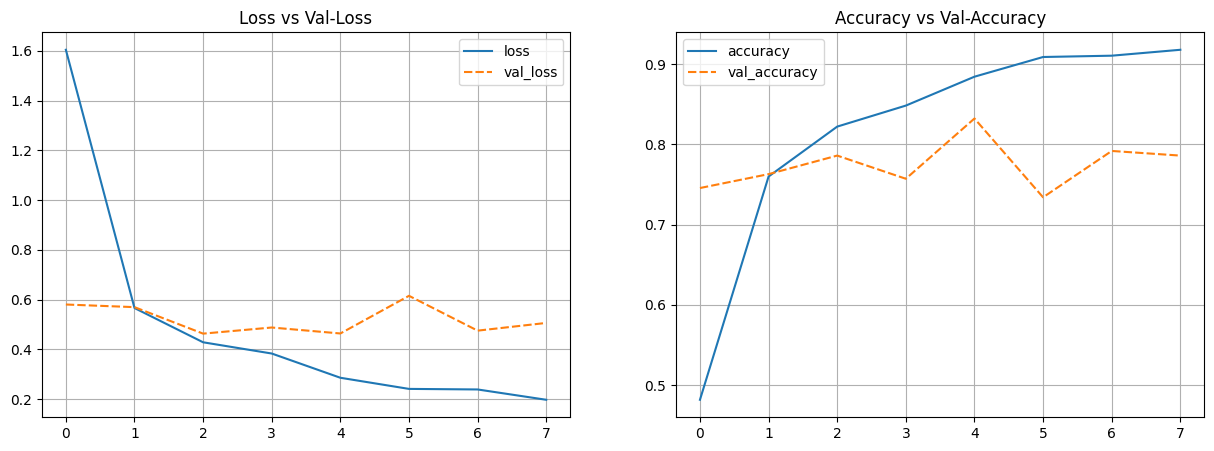

In [16]:
# Plot training results

history_seq_df = pd.DataFrame(history_seq.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_seq_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_seq_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')
plt.show()

**Explanation**  
1. Loss Graph Analysis:
- The training loss (blue line) shows a sharp decline initially, indicating that the model is learning and improving quickly from its initial state. After the steep drop, it continues to decrease at a slower rate, which is typical as the model starts to converge.
- The validation loss (orange dashed line) decreases alongside the training loss but starts to show fluctuations around the 10th epoch. This could be indicative of the model beginning to overfit the training data, as suggested by the occasional increases in validation loss. These fluctuations become more pronounced as training progresses, reinforcing the possibility of overfitting.
2. Accuracy Graph Analysis:
- The training accuracy (blue line) increases rapidly at the start and then plateaus, which is expected behavior as the model approaches its capacity to learn from the training data.
- The validation accuracy (orange dashed line) also increases but shows variability and does not reach the stability seen in training accuracy. This variability and the failure to match the training accuracy further suggest that the model might be overfitting the training data, as it is not generalizing as effectively to the unseen validation data.  

Conclusions:
- Potential Overfitting: The divergence between the training and validation metrics (both loss and accuracy) suggests overfitting. The model performs well on training data but struggles to achieve similar results on validation data.
- Model Adjustment Needed: To combat overfitting, strategies such as introducing more dropout, adding regularization, or using techniques like data augmentation could be employed. Additionally, early stopping could be implemented to halt training when the validation loss starts to increase, preventing further divergence from optimal performance.
- Further Evaluation: It would also be beneficial to evaluate the model on a completely separate test set to better understand its generalization capabilities outside of the training and validation environments. This could provide a more rounded view of how the model might perform in practical applications.

In [17]:
# Check the performance of test-set

## Get the probability
y_pred_prob_seq = model_seq.predict(test_set)

## Get class with maximum probability
y_pred_class_seq = np.argmax(y_pred_prob_seq, axis=-1)

## Display Classification Report
print(classification_report(test_set.classes, y_pred_class_seq, target_names=np.array(list(train_set.class_indices.keys()))))

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
              precision    recall  f1-score   support

        Boys       0.74      0.86      0.79       114
       Girls       0.74      0.60      0.66        85
         Men       0.86      0.84      0.85       122
       Women       0.85      0.84      0.85       115

    accuracy                           0.80       436
   macro avg       0.80      0.79      0.79       436
weighted avg       0.80      0.80      0.80       436



**Explanation**  
The model performs well with an overall accuracy of 0.84, showing strength particularly in identifying Men and Women. However, there is room for improvement in distinguishing Boys and especially Girls more precisely, perhaps by tuning the model or providing more discriminative features. Enhanced preprocessing, augmented data, or even revisiting the model architecture could potentially address these discrepancies and balance the precision-recall trade-off better across all categories.

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Model Inference**</p>

In [18]:
# Specify the path to the directory in Google Drive that contains the images
drive_path = r'.\inference'

data = []
imgf = ['jpg', 'jpeg', 'png', 'webp']

# Iterate all files in a directory in Google Drive
for filename in os.listdir(drive_path):
    # Checks if the file extension is included in the list of desired image extensions
    if any(filename.lower().endswith(ext) for ext in imgf):
        # Add the full path of the image file to the data list
        data.append(os.path.join(drive_path, filename))

# Create a DataFrame from the data list with column name 'image'
data_df = pd.DataFrame(data, columns=['image'])

**Explanation**  
Specify the path to the directory containing the images. Iterate over all files in the directory and check if the file extension is in the list of desired image extensions. Add the full path of the image file to the data list if it meets the condition. Create a DataFrame from the data list with column name 'image'.


In [19]:
file_names = []
for index, row in data_df.iterrows():
    file_names.append(row['image'])

print(file_names)


['.\\inference\\boys.jpg', '.\\inference\\girls.jpg', '.\\inference\\men.jpg', '.\\inference\\women.jpg']


In [20]:
data_df

,image
0,.\inference\boys.jpg
1,.\inference\girls.jpg
2,.\inference\men.jpg
3,.\inference\women.jpg


In [21]:
def image_preprocessing(data):
    # Hyperparameters
    img_height = 224
    img_width = 224
    batch_size = 64

    image_array = []
    # Convert to array
    for i in data['image'].values:
        img = tf.keras.utils.load_img(i)
        image_array.append(tf.keras.preprocessing.image.img_to_array(img))

    # Resize the image
    new_image = []
    for i in image_array:
        new_image.append(np.array(tf.image.resize(i, (img_height, img_width))))
    new_image = np.array(new_image)
    return new_image

**Explanation**  
The function image_preprocessing(data) takes a DataFrame data containing image file paths and preprocesses the images by loading them using TensorFlow's load_img() function, converting them to arrays, and resizing them to a specified height and width using TensorFlow's resize() function. The resulting preprocessed images are returned as a NumPy array. The hyperparameters such as image height, width, and batch size are set within the function.

In [22]:
new_image = image_preprocessing(data_df)

In [23]:
# Define Class and Function
class GenderClassifier:
    def __init__(self):
        self.class_mapping = {0: 'Boys', 1: 'Girls', 2: 'Men', 3: 'Women'}
        self.unknown_class = 'Unknown'

    def model_pred(self, model, feature):
        pred = model.predict(feature)
        index = []
        for i in pred:
            index.append(np.argmax(i) if i[np.argmax(i)] > 0.5 else len(self.class_mapping))

        # Mengonversi indeks ke nama kelas menggunakan mapping yang ditentukan
        index = [self.class_mapping.get(i, self.unknown_class) for i in index]

        return index

**Explanation**  
The GenderClassifier class is designed to classify gender based on predicted features using a trained model. In the __init__ method, it initializes a dictionary class_mapping that maps class indices to gender labels ('Boys', 'Girls', 'Men', 'Women'), and sets unknown_class as 'Unknown'.

The model_pred method takes a model and features as input and predicts the gender for each set of features using the model. It iterates through the predictions, determines the index of the maximum prediction probability (if it's greater than 0.5), and converts the index to a gender label using the mapping defined in class_mapping. If the prediction probability is not greater than 0.5, it assigns the class label as 'Unknown'. Finally, it returns a list of gender labels corresponding to the input features.

In [24]:
classifier = GenderClassifier()

In [25]:
# Predict From data inference
predictions_seq = classifier.model_pred(model_seq, new_image)
predictions_seq

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


['Boys', 'Girls', 'Men', 'Women']

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Saving Model**</p>

In [26]:
# Saving the model with 2 data type
model_seq.save('model_fix.h5')
# model_seq.save('model_fix.keras')

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Recommender System**</p>

In [27]:
# Checking Total
print("Total number of products : ", fashion_df.shape[0])
print("Total number of unique subcategories : ", fashion_df["SubCategory"].nunique())
print("Total number of unique gender types : ", fashion_df["Gender"].nunique())

Total number of products :  2906
Total number of unique subcategories :  9
Total number of unique gender types :  4


**Explanation**  
We can see the total product, subcategories and all gender types from the data

In [28]:
# Define Variable
apparel_boys = fashion_df[fashion_df["Gender"]=="Boys"]
apparel_girls = fashion_df[fashion_df["Gender"]=="Girls"]
footwear_men = fashion_df[fashion_df["Gender"]=="Men"]
footwear_women = fashion_df[fashion_df["Gender"]=="Women"]

**Explanation**  
The syntax is defining new variable for every gender

## **Image Extraction**

### **Image Extraction for Gender Men**

In [29]:
img_width, img_height = 224, 224

#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
data_dir = r".\Fashion_Dataset\Men_Images\Men"

nb_train_samples = 811
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("\\")+1):i.find(".")])
    extracted_features = model.predict(generator, nb_train_samples // batch_size)
    # Assuming you have a Functional model named 'model' and a generator named 'generator'
    extracted_features = extracted_features.reshape((811, 100352))
    
    np.save(open('./Men_ResNet_features.npy', 'wb'), extracted_features)
    np.save(open('./Men_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))
    
extract_features()

Found 811 images belonging to 1 classes.
811/811 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step


**Explanation**  
he GenderClassifier class serves as a tool for gender classification. It establishes a mapping between class indices and gender labels, with an additional class for cases where the prediction probability is below a threshold, labeled as 'Unknown'. The model_pred method takes a trained model and a set of features as input, then predicts the gender for each set of features. It iterates through the predictions, determining the index of the maximum prediction probability (if it exceeds 0.5), and maps this index to a gender label using the predefined mapping. If the prediction probability is below 0.5, it assigns the gender label as 'Unknown'. Ultimately, it returns a list of gender labels corresponding to the input features.

### **Image Extraction for Gender Women**

In [30]:
img_width, img_height = 224, 224


#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
data_dir = r".\Fashion_Dataset\Women_Images\Women"

nb_train_samples = 769
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("\\")+1):i.find(".")])
    extracted_features = model.predict(generator, nb_train_samples // batch_size)
    extracted_features = extracted_features.reshape((769, 100352))
    
    np.save(open('./Women_ResNet_features.npy', 'wb'), extracted_features)
    np.save(open('./Women_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))
    
extract_features()

Found 769 images belonging to 1 classes.
769/769 ━━━━━━━━━━━━━━━━━━━━ 53s 66ms/step


### **Image Extraction for Gender Boys**

In [31]:
img_width, img_height = 224, 224


#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
data_dir = r".\Fashion_Dataset\Boys_Images\Boys"

nb_train_samples = 759
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("\\")+1):i.find(".")])
    extracted_features = model.predict(generator, nb_train_samples // batch_size)
    extracted_features = extracted_features.reshape((759, 100352))
    
    np.save(open('./Boys_ResNet_features.npy', 'wb'), extracted_features)
    np.save(open('./Boys_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))
    
extract_features()

Found 759 images belonging to 1 classes.
759/759 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step


### **Image Extraction for Gender Girls**

In [32]:
img_width, img_height = 224, 224


#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
data_dir = r".\Fashion_Dataset\Girls_Images\Girls"

nb_train_samples = 567
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("\\")+1):i.find(".")])
    extracted_features = model.predict(generator, nb_train_samples // batch_size)
    extracted_features = extracted_features.reshape((567, 100352))
    
    np.save(open('./Girls_ResNet_features.npy', 'wb'), extracted_features)
    np.save(open('./Girls_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))

extract_features()

Found 567 images belonging to 1 classes.
567/567 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step


## **Loading Extracted File to Trying Recommender System**

In [37]:
# Define new variable for Extracted Images Files
boys_extracted_features = np.load('Boys_ResNet_features.npy')
boys_Productids = np.load('Boys_ResNet_feature_product_ids.npy')
girls_extracted_features = np.load('Girls_ResNet_features.npy')
girls_Productids = np.load('Girls_ResNet_feature_product_ids.npy')
men_extracted_features = np.load('Men_ResNet_features.npy')
men_Productids = np.load('Men_ResNet_feature_product_ids.npy')
women_extracted_features = np.load('Women_ResNet_features.npy')
women_Productids = np.load('Women_ResNet_feature_product_ids.npy')
fashion_df["ProductId"] = fashion_df["ProductId"].astype(str)

**Explanation**  
From the syntax above we can see the Extracted images already inside variable, so we can use the variable for the Recommender System.

## **Function for Recommender System**

In [38]:
# Define function to Recommender System
def get_similar_products_cnn(product_id, num_results):
    if(fashion_df[fashion_df['ProductId']==product_id]['Gender'].values[0]=="Boys"):
        extracted_features = boys_extracted_features
        Productids = boys_Productids
    elif(fashion_df[fashion_df['ProductId']==product_id]['Gender'].values[0]=="Girls"):
        extracted_features = girls_extracted_features
        Productids = girls_Productids
    elif(fashion_df[fashion_df['ProductId']==product_id]['Gender'].values[0]=="Men"):
        extracted_features = men_extracted_features
        Productids = men_Productids
    elif(fashion_df[fashion_df['ProductId']==product_id]['Gender'].values[0]=="Women"):
        extracted_features = women_extracted_features
        Productids = women_Productids
    Productids = list(Productids)
    doc_id = Productids.index(product_id)
    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    print("="*20, "input product details", "="*20)
    ip_row = fashion_df[['ImageURL','ProductTitle']].loc[fashion_df['ProductId']==Productids[indices[0]]]
    for indx, row in ip_row.iterrows():
        display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
        print('Product Title: ', row['ProductTitle'])
    print("\n","="*20, "Recommended products", "="*20)
    for i in range(1,len(indices)):
        rows = fashion_df[['ImageURL','ProductTitle']].loc[fashion_df['ProductId']==Productids[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
            print('Product Title: ', row['ProductTitle'])
            print('Euclidean Distance from input image:', pdists[i])

**Explanation**  
From the syntax above we make a function to make a Recommender System

==================== input product details ====================


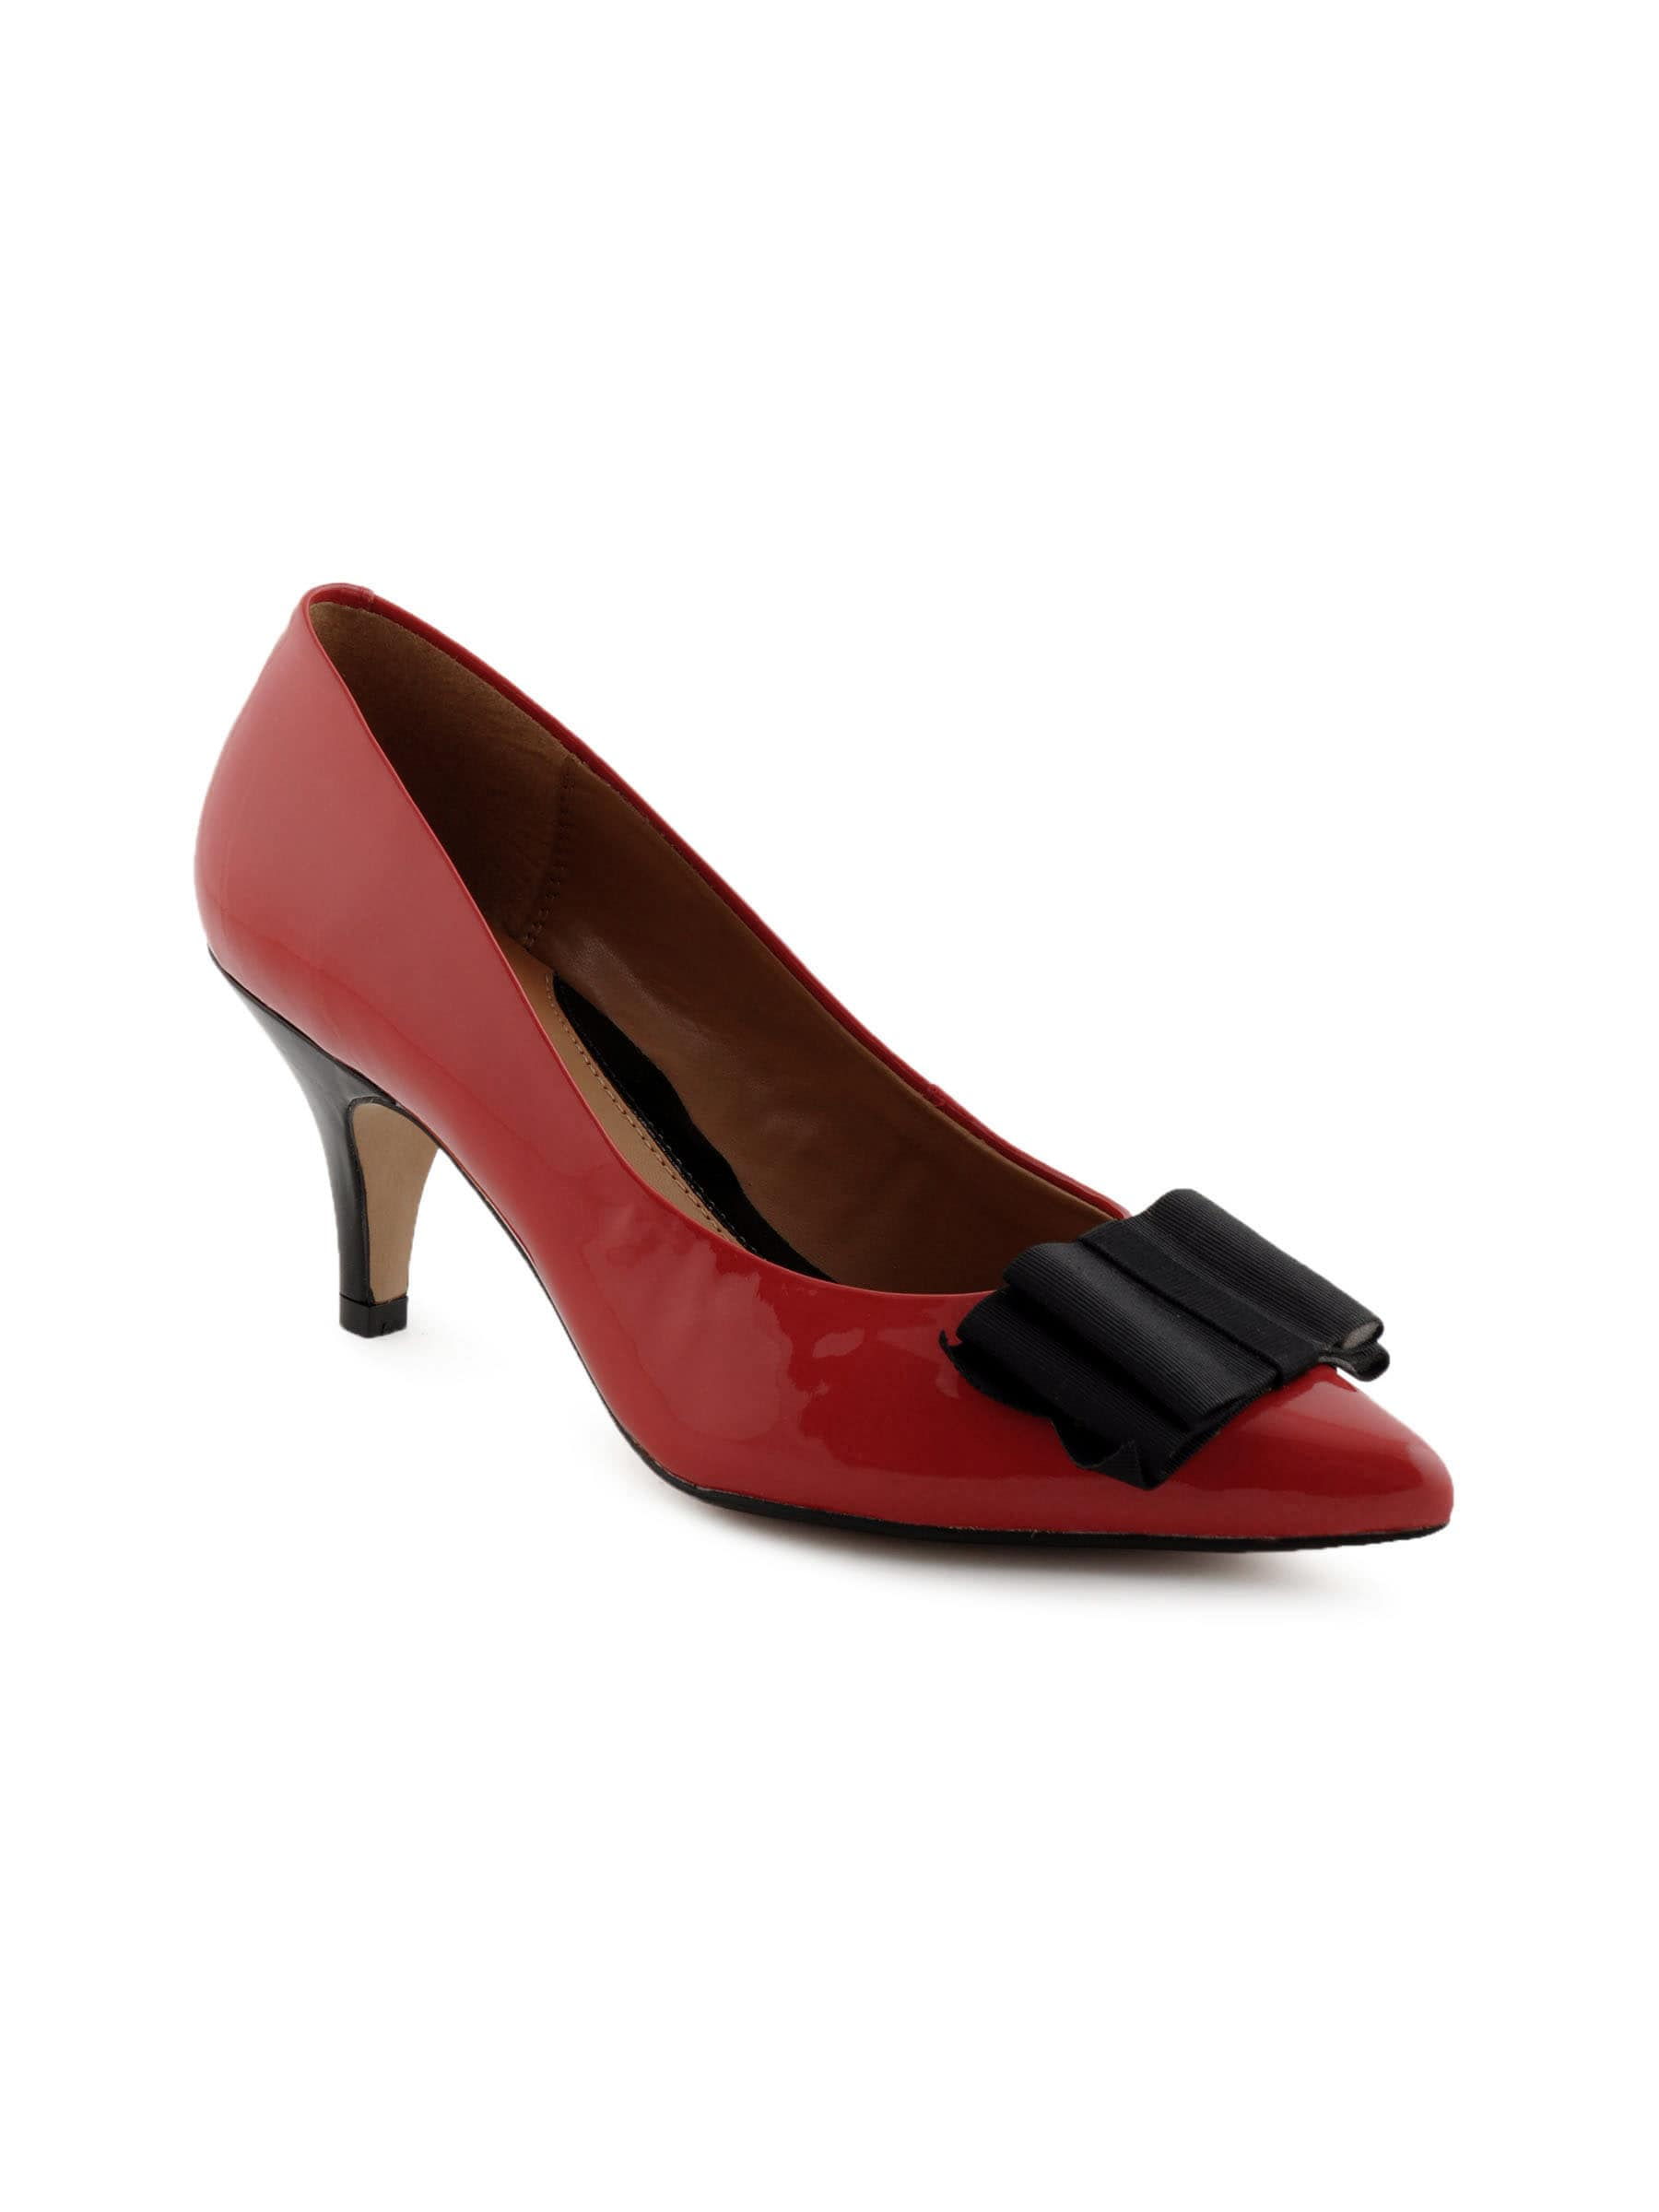

Product Title:  Clarks Women Balti Zing Red Heels

 ==================== Recommended products ====================


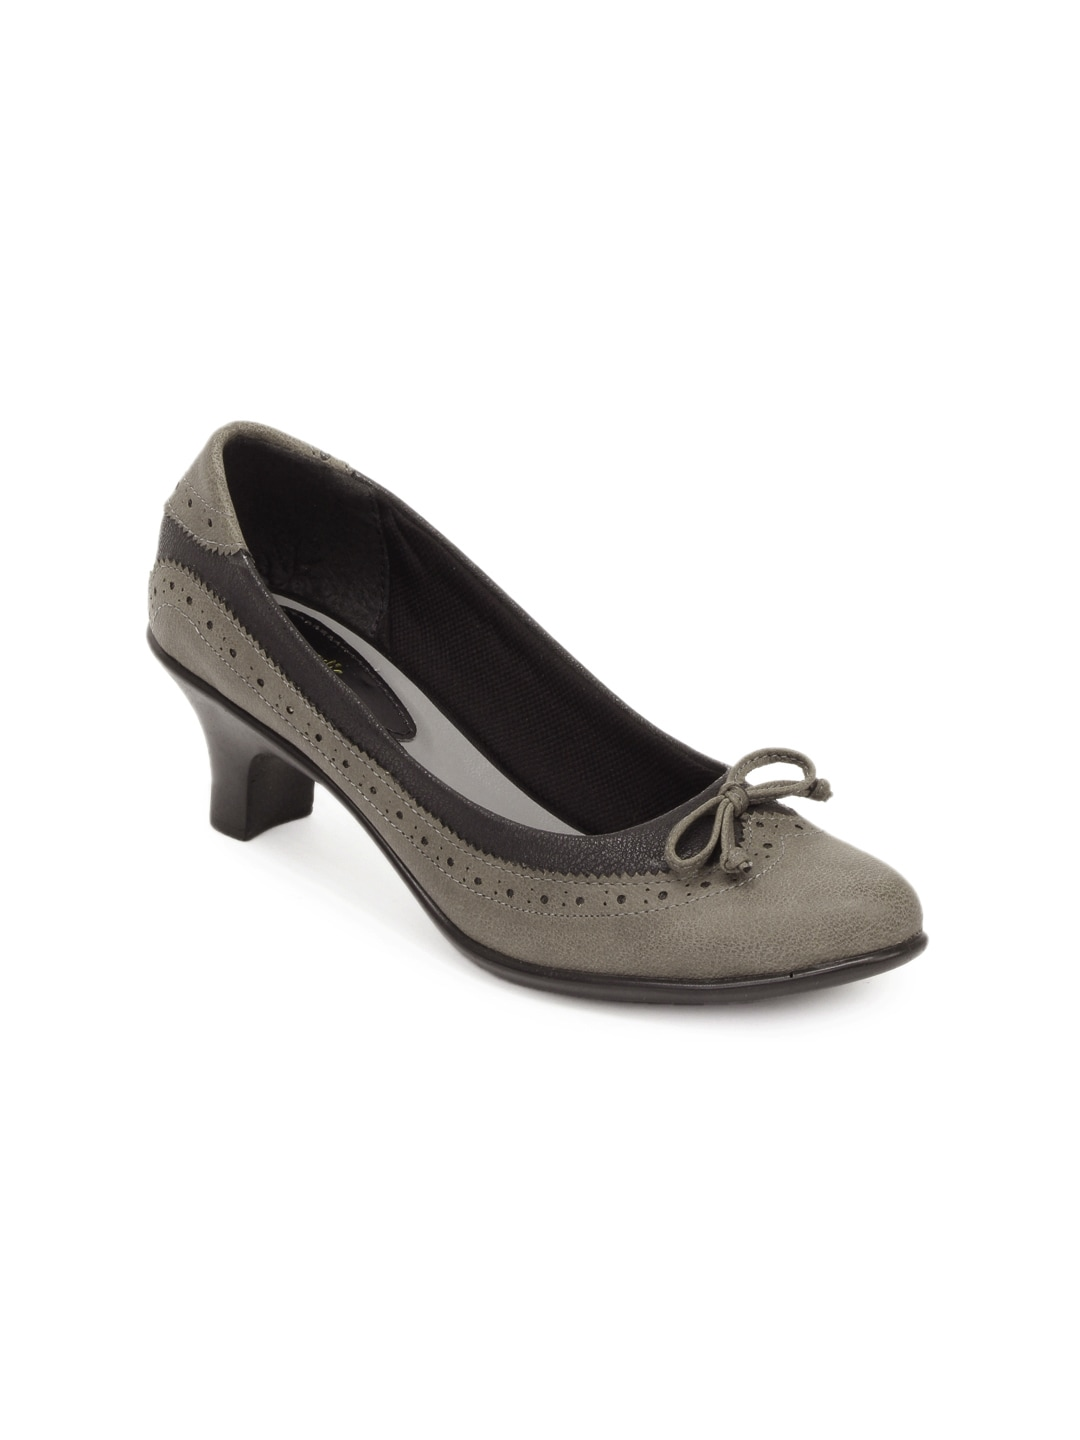

Product Title:  Catwalk Women Black & Grey Heels
Euclidean Distance from input image: 41.76011


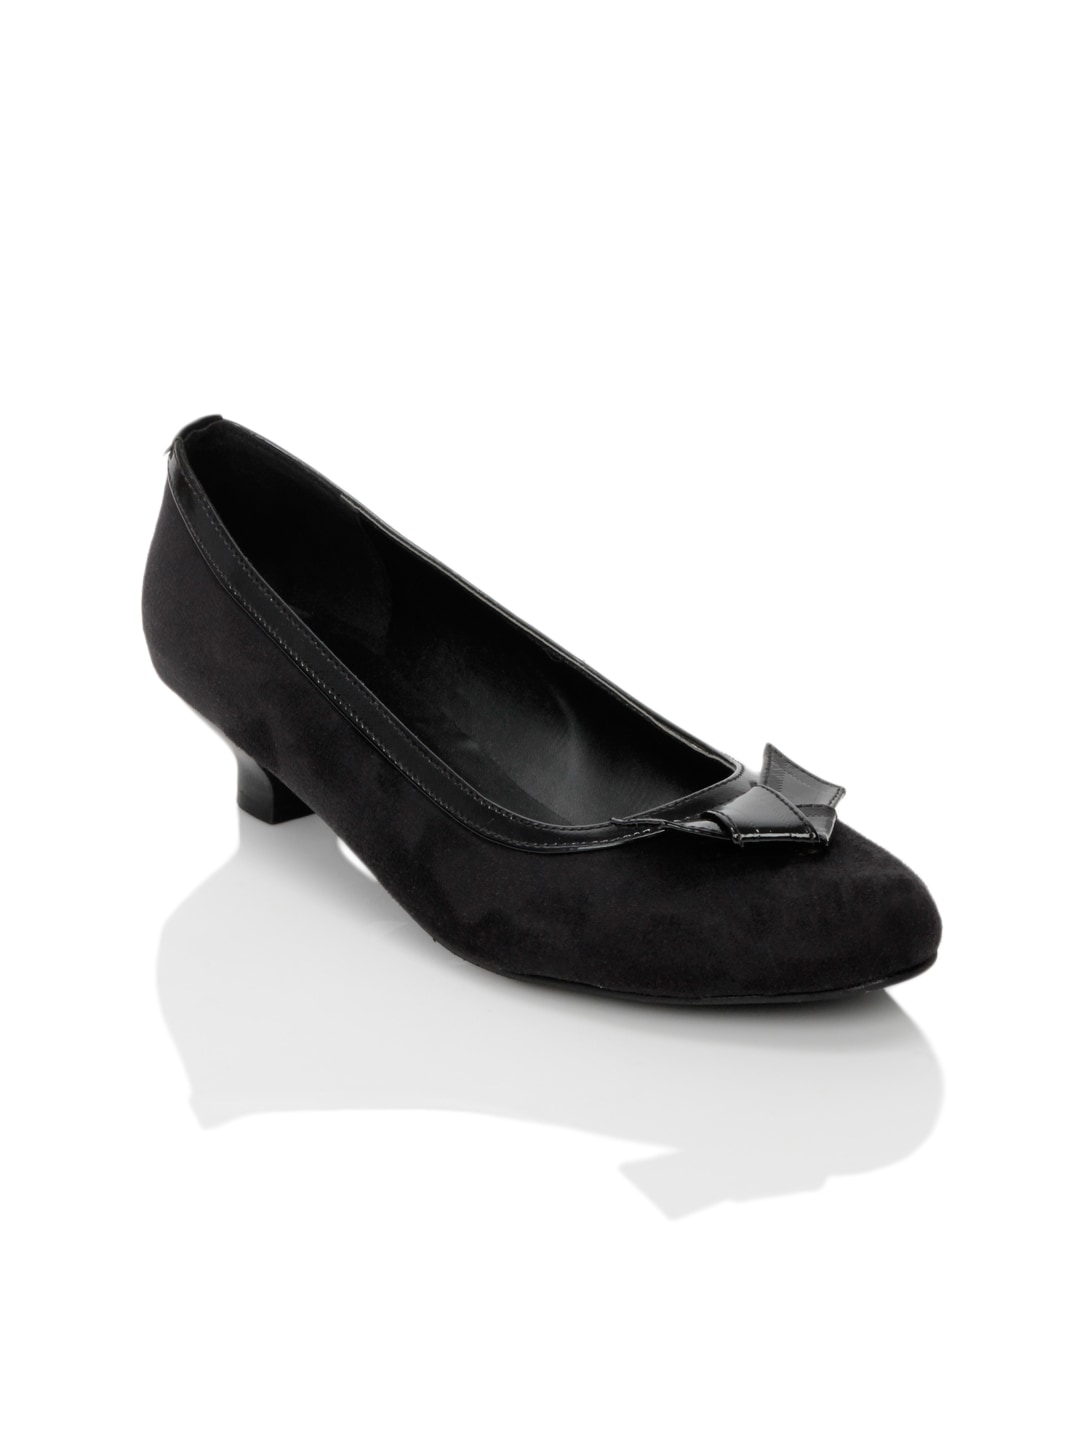

Product Title:  Rocia Women Black Shoes
Euclidean Distance from input image: 44.68557


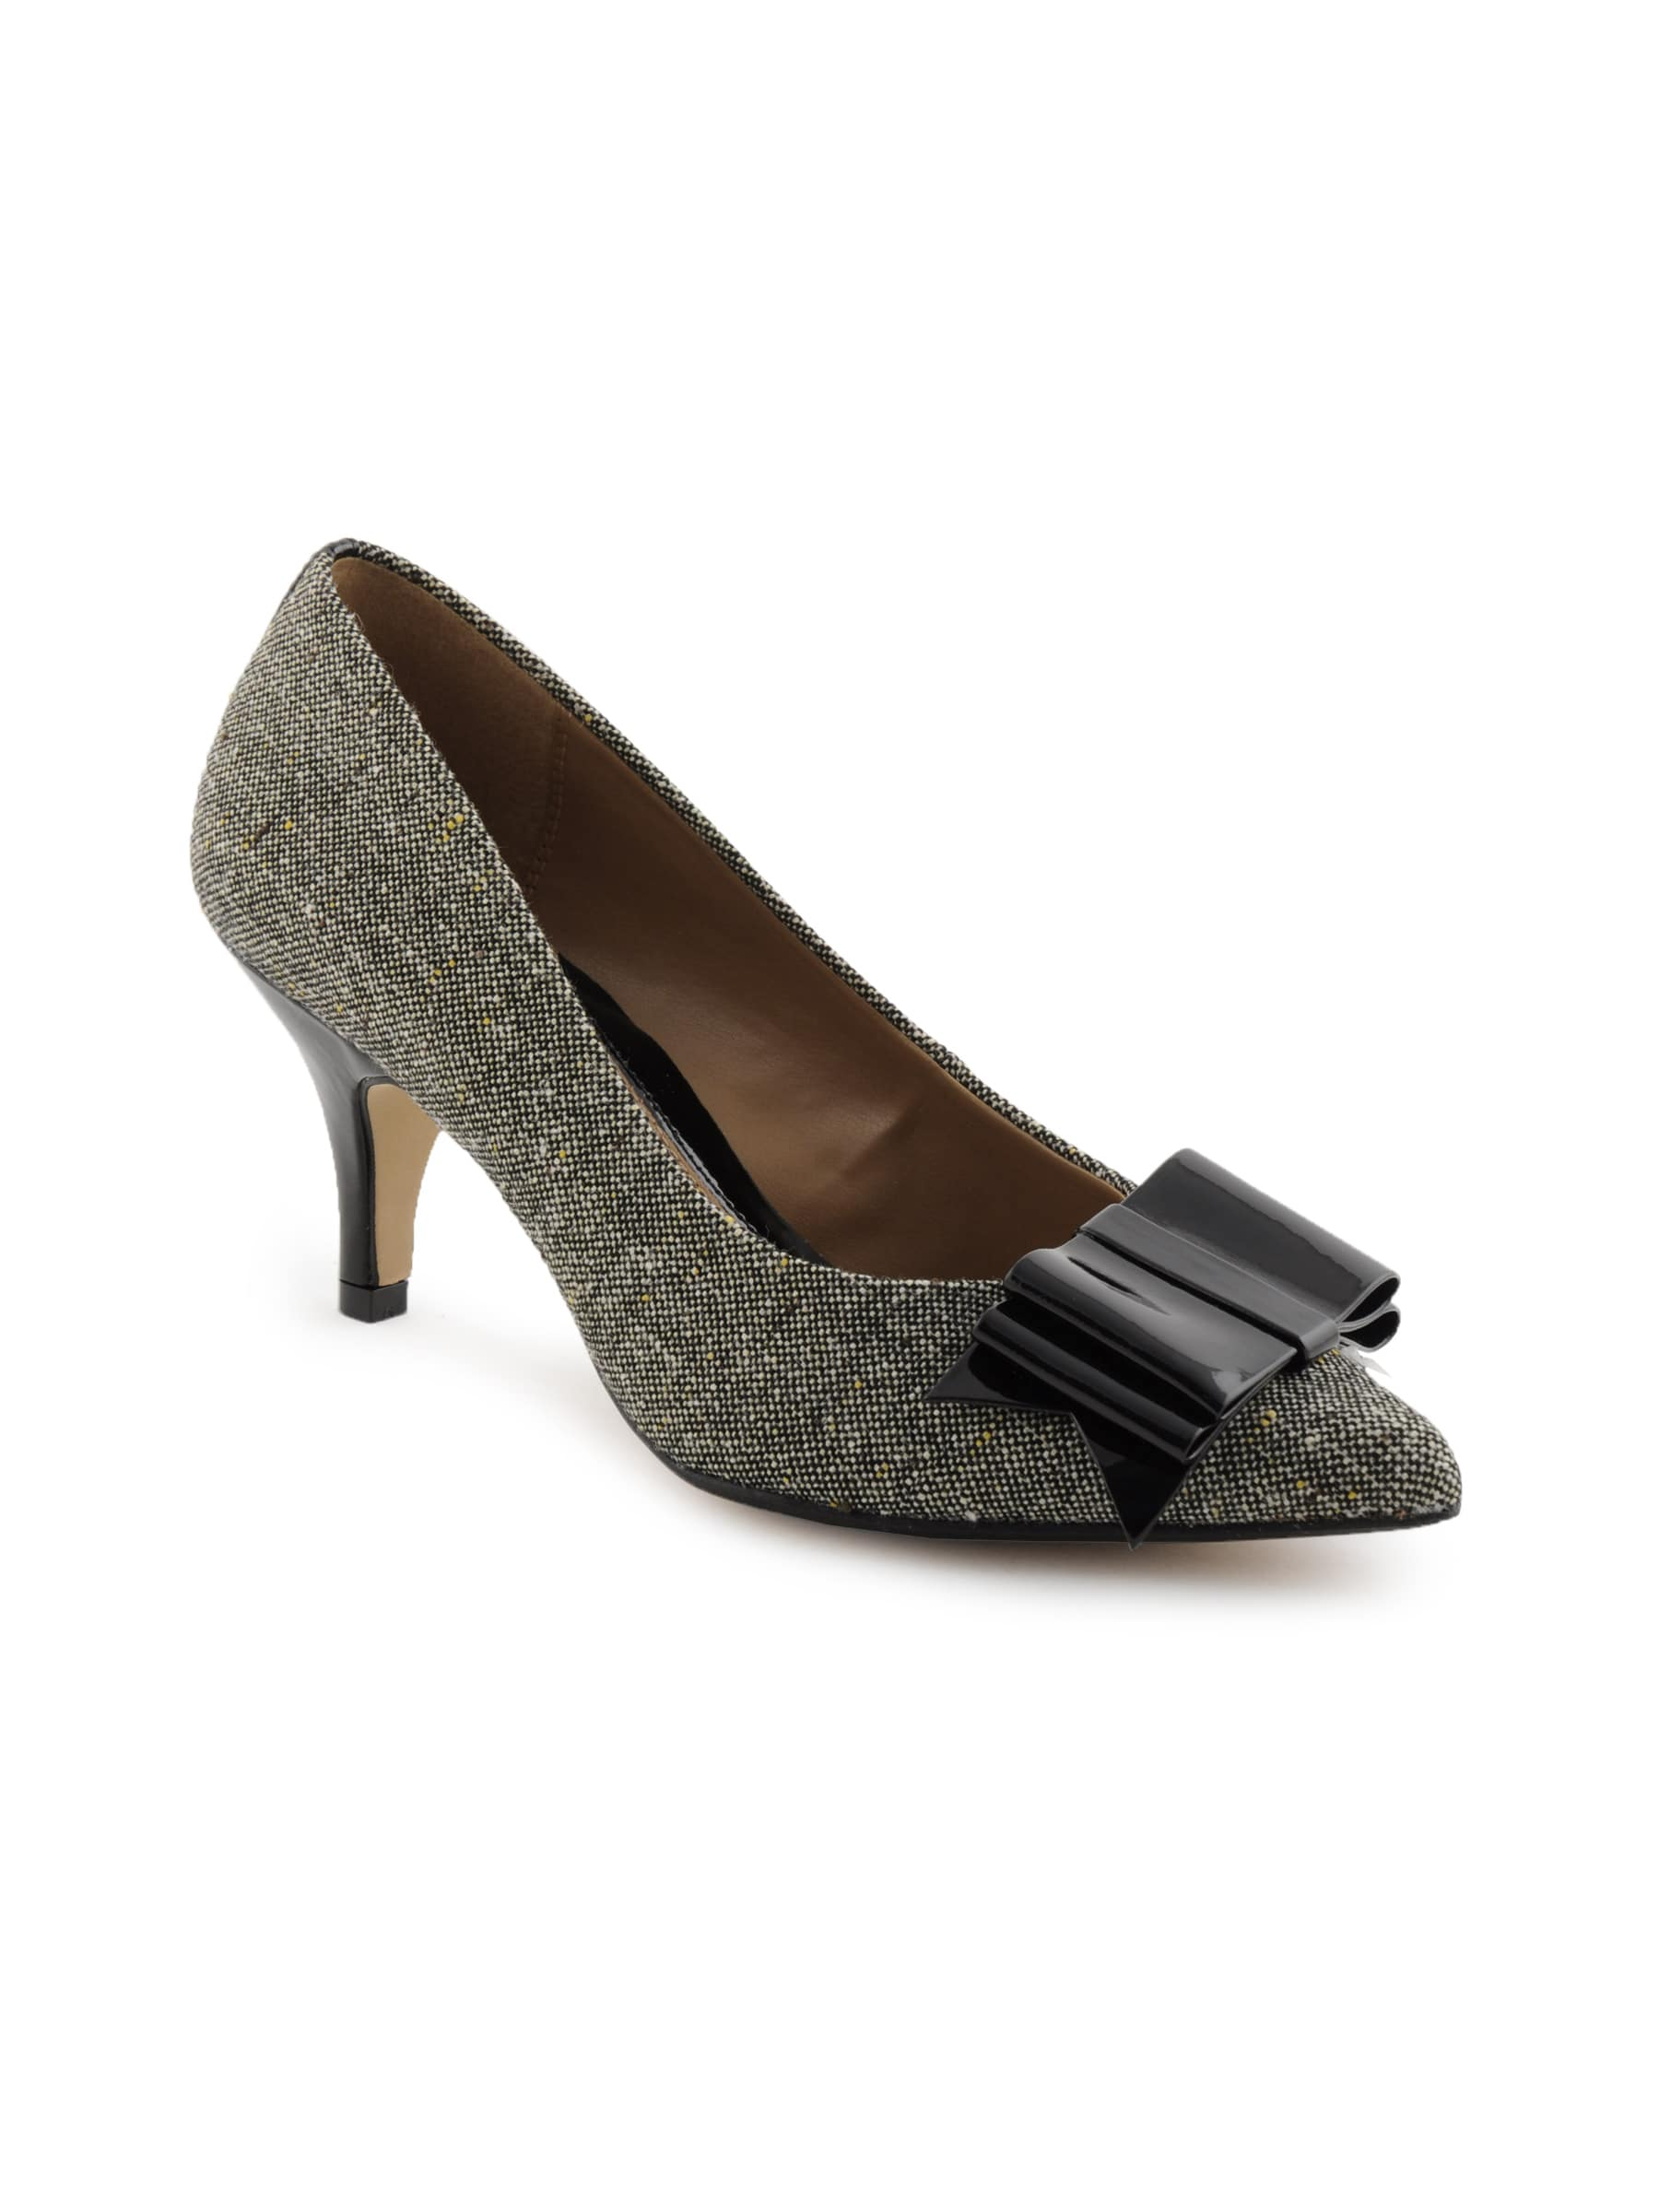

Product Title:  Clarks Women Balti Zing Black Heels
Euclidean Distance from input image: 45.10425


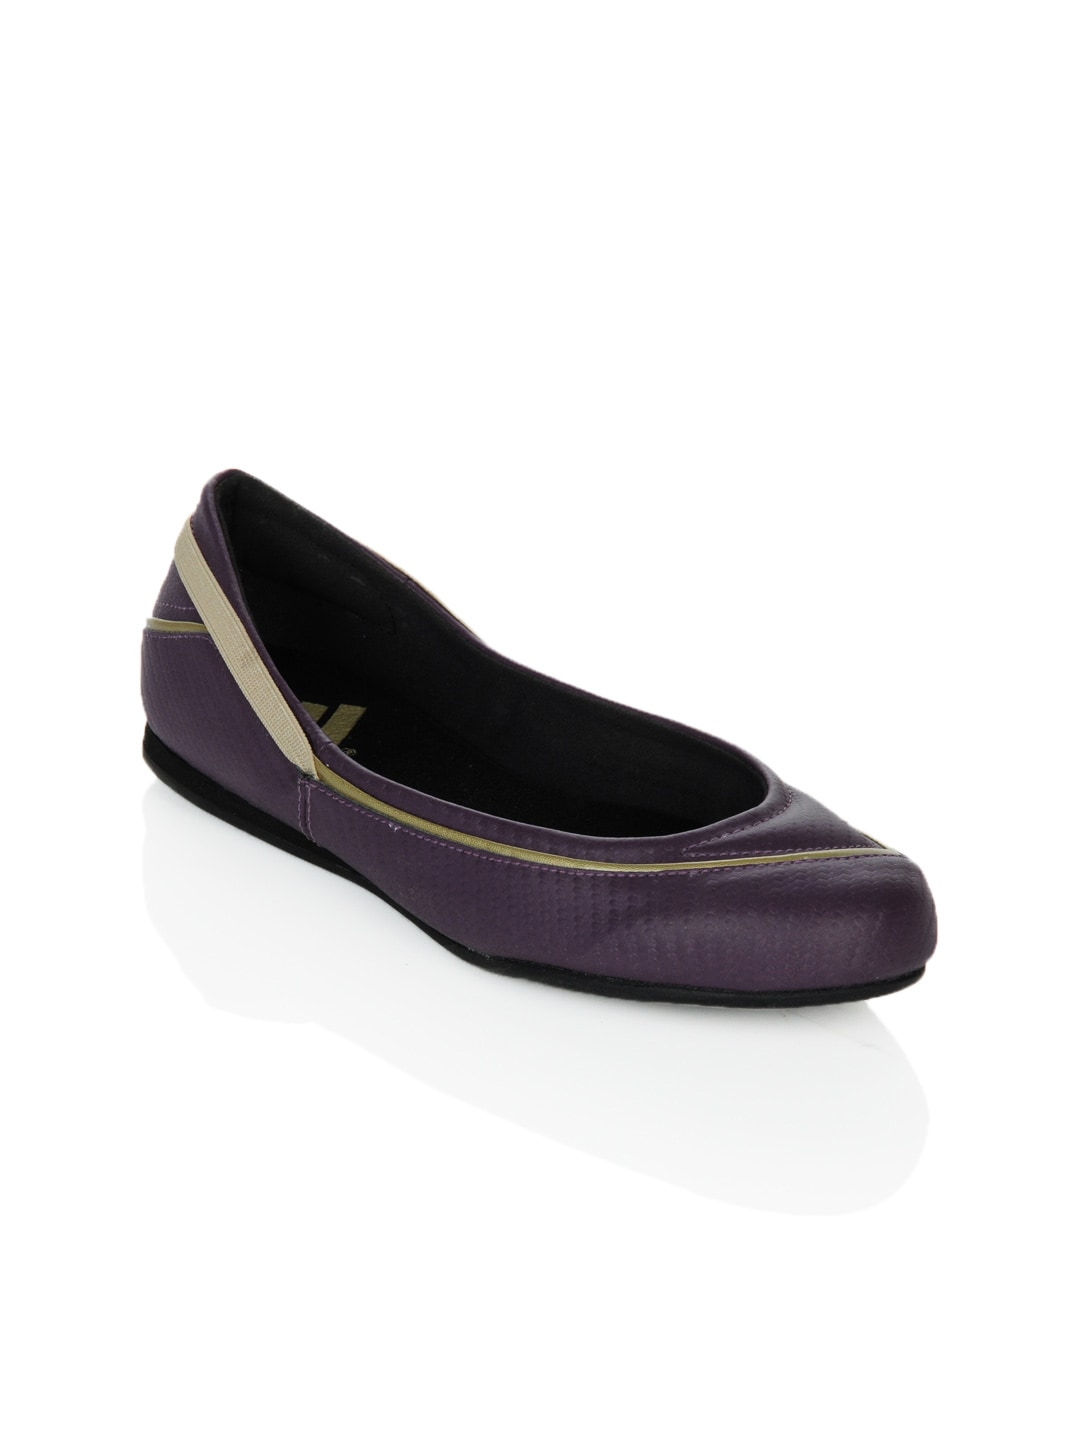

Product Title:  ADIDAS Women Ballerina Purple Shoes
Euclidean Distance from input image: 46.149582


In [39]:
# Using Function to Test Recommender System
get_similar_products_cnn('21030', 5)

**Explanation**  
As we can see the Recommender System can recomending the image that have similarity

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">**Conclusion**</p>

## **Model Conclusion**  

In summary, the analysis of the loss and accuracy graphs suggests potential overfitting in the model. The sharp decline in training loss and rapid increase in training accuracy indicate initial learning, but the subsequent plateauing and divergence from validation metrics indicate a lack of generalization. Fluctuations and occasional increases in validation loss, coupled with variability in validation accuracy, further support this notion. To address overfitting, adjustments such as increasing dropout, adding regularization, or utilizing data augmentation techniques are recommended. Additionally, implementing early stopping could prevent further divergence between training and validation performance. To validate the model's generalization, evaluation on a separate test set is crucial for assessing its practical performance beyond the training and validation datasets.  
  
The model performs well with an overall accuracy of 0.84, showing strength particularly in identifying Men and Women. However, there is room for improvement in distinguishing Boys and especially Girls more precisely, perhaps by tuning the model or providing more discriminative features. Enhanced preprocessing, augmented data, or even revisiting the model architecture could potentially address these discrepancies and balance the precision-recall trade-off better across all categories.

## **Recommender System**

The recommender system successfully analyzes uploaded images to provide personalized recommendations. Leveraging image processing techniques, it extracts features from the uploaded pictures and matches them with similar products in the database. The system's ability to accurately recommend products based on visual similarity enhances user experience by offering relevant suggestions aligned with their preferences. Moreover, the system's seamless integration of image recognition technology demonstrates its adaptability and effectiveness in catering to user needs. By streamlining the recommendation process through image analysis, the system enhances user engagement and satisfaction, fostering a more personalized and intuitive shopping experience.